In [1]:
!pip install pandas matplotlib scikit-learn seaborn

# This notebook will familiarise you with classification


In [2]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the data 
df=pd.read_csv('sleep_health_and_lifestyle_dataset.csv')
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

## We observe that many features in this dataset is text (or string) data. Computers cannot understand string as is. We need to convert them into numbers. These are called categorical features. This is because they represent a class of categories.
We also obser that our target column, the Sleep Disorder column, has missing values. In this case we simply cannot drop these rows, as we also need to model the behaviour of the people who don't have any disorders.
[ ]


In [4]:
# clean the data first
df = df.fillna("Normal")
df

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   
373        374  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   
373                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0           126/83          77         4200         Normal  
1           125/80          75        10000         Normal  
2           125/80          75        10000         Normal  
3           140/90          85         3000    Sleep Apnea  
4           140/90          85         3000    Sleep Apnea  
..             ...         ...          ...            ...  
369         140/95          68         7000    Sleep Apnea  
370         140/95          68         7000    Sleep Apnea  
371         140/95          68         7000    Sleep Apnea  
372         140/95          68         7000    Sleep Apnea  
373         140/95          68         7000    Sleep Apnea  

[374 rows x 13 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
df.describe()

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [8]:
# collect the categorical columns using list comprehension. Understand this code
categorical_columns = [column for column in df.columns if df[column].dtype == 'object']
print(categorical_columns)

['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']


In [13]:
# now we need to create dictionaries to map the categorical values to numerical values
index_dictionary = dict()
inv_index_dictionary = dict()
for col in categorical_columns:
    unique_values = df[col].unique()
    idx_dict = {val: idx for idx, val in enumerate(unique_values)}        # This dictionary takes the string value and returns a number
    inv_idx_dict = {idx: val for idx, val in enumerate(unique_values)}    # This dictionary takes a number and returns a string value
    # convert the values of the column to number in the dataframe
    df[col] = df[col].map(idx_dict)
    # Store the dictionaries to be used later
    index_dictionary[col] = idx_dict
    inv_index_dictionary[col] = inv_idx_dict

In [14]:
df.head()

Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0          1       0   27           0             6.1                 6   
1          2       0   28           1             6.2                 6   
2          3       0   28           1             6.2                 6   
3          4       0   28           2             5.9                 4   
4          5       0   28           2             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             0               0   
1                       60             8             1               1   
2                       60             8             1               1   
3                       30             8             2               2   
4                       30             8             2               2   

   Heart Rate  Daily Steps  Sleep Disorder  
0          77         4200               0  
1          75        10000               0  
2          75        10000               0  
3          85         3000               1  
4          85         3000               1

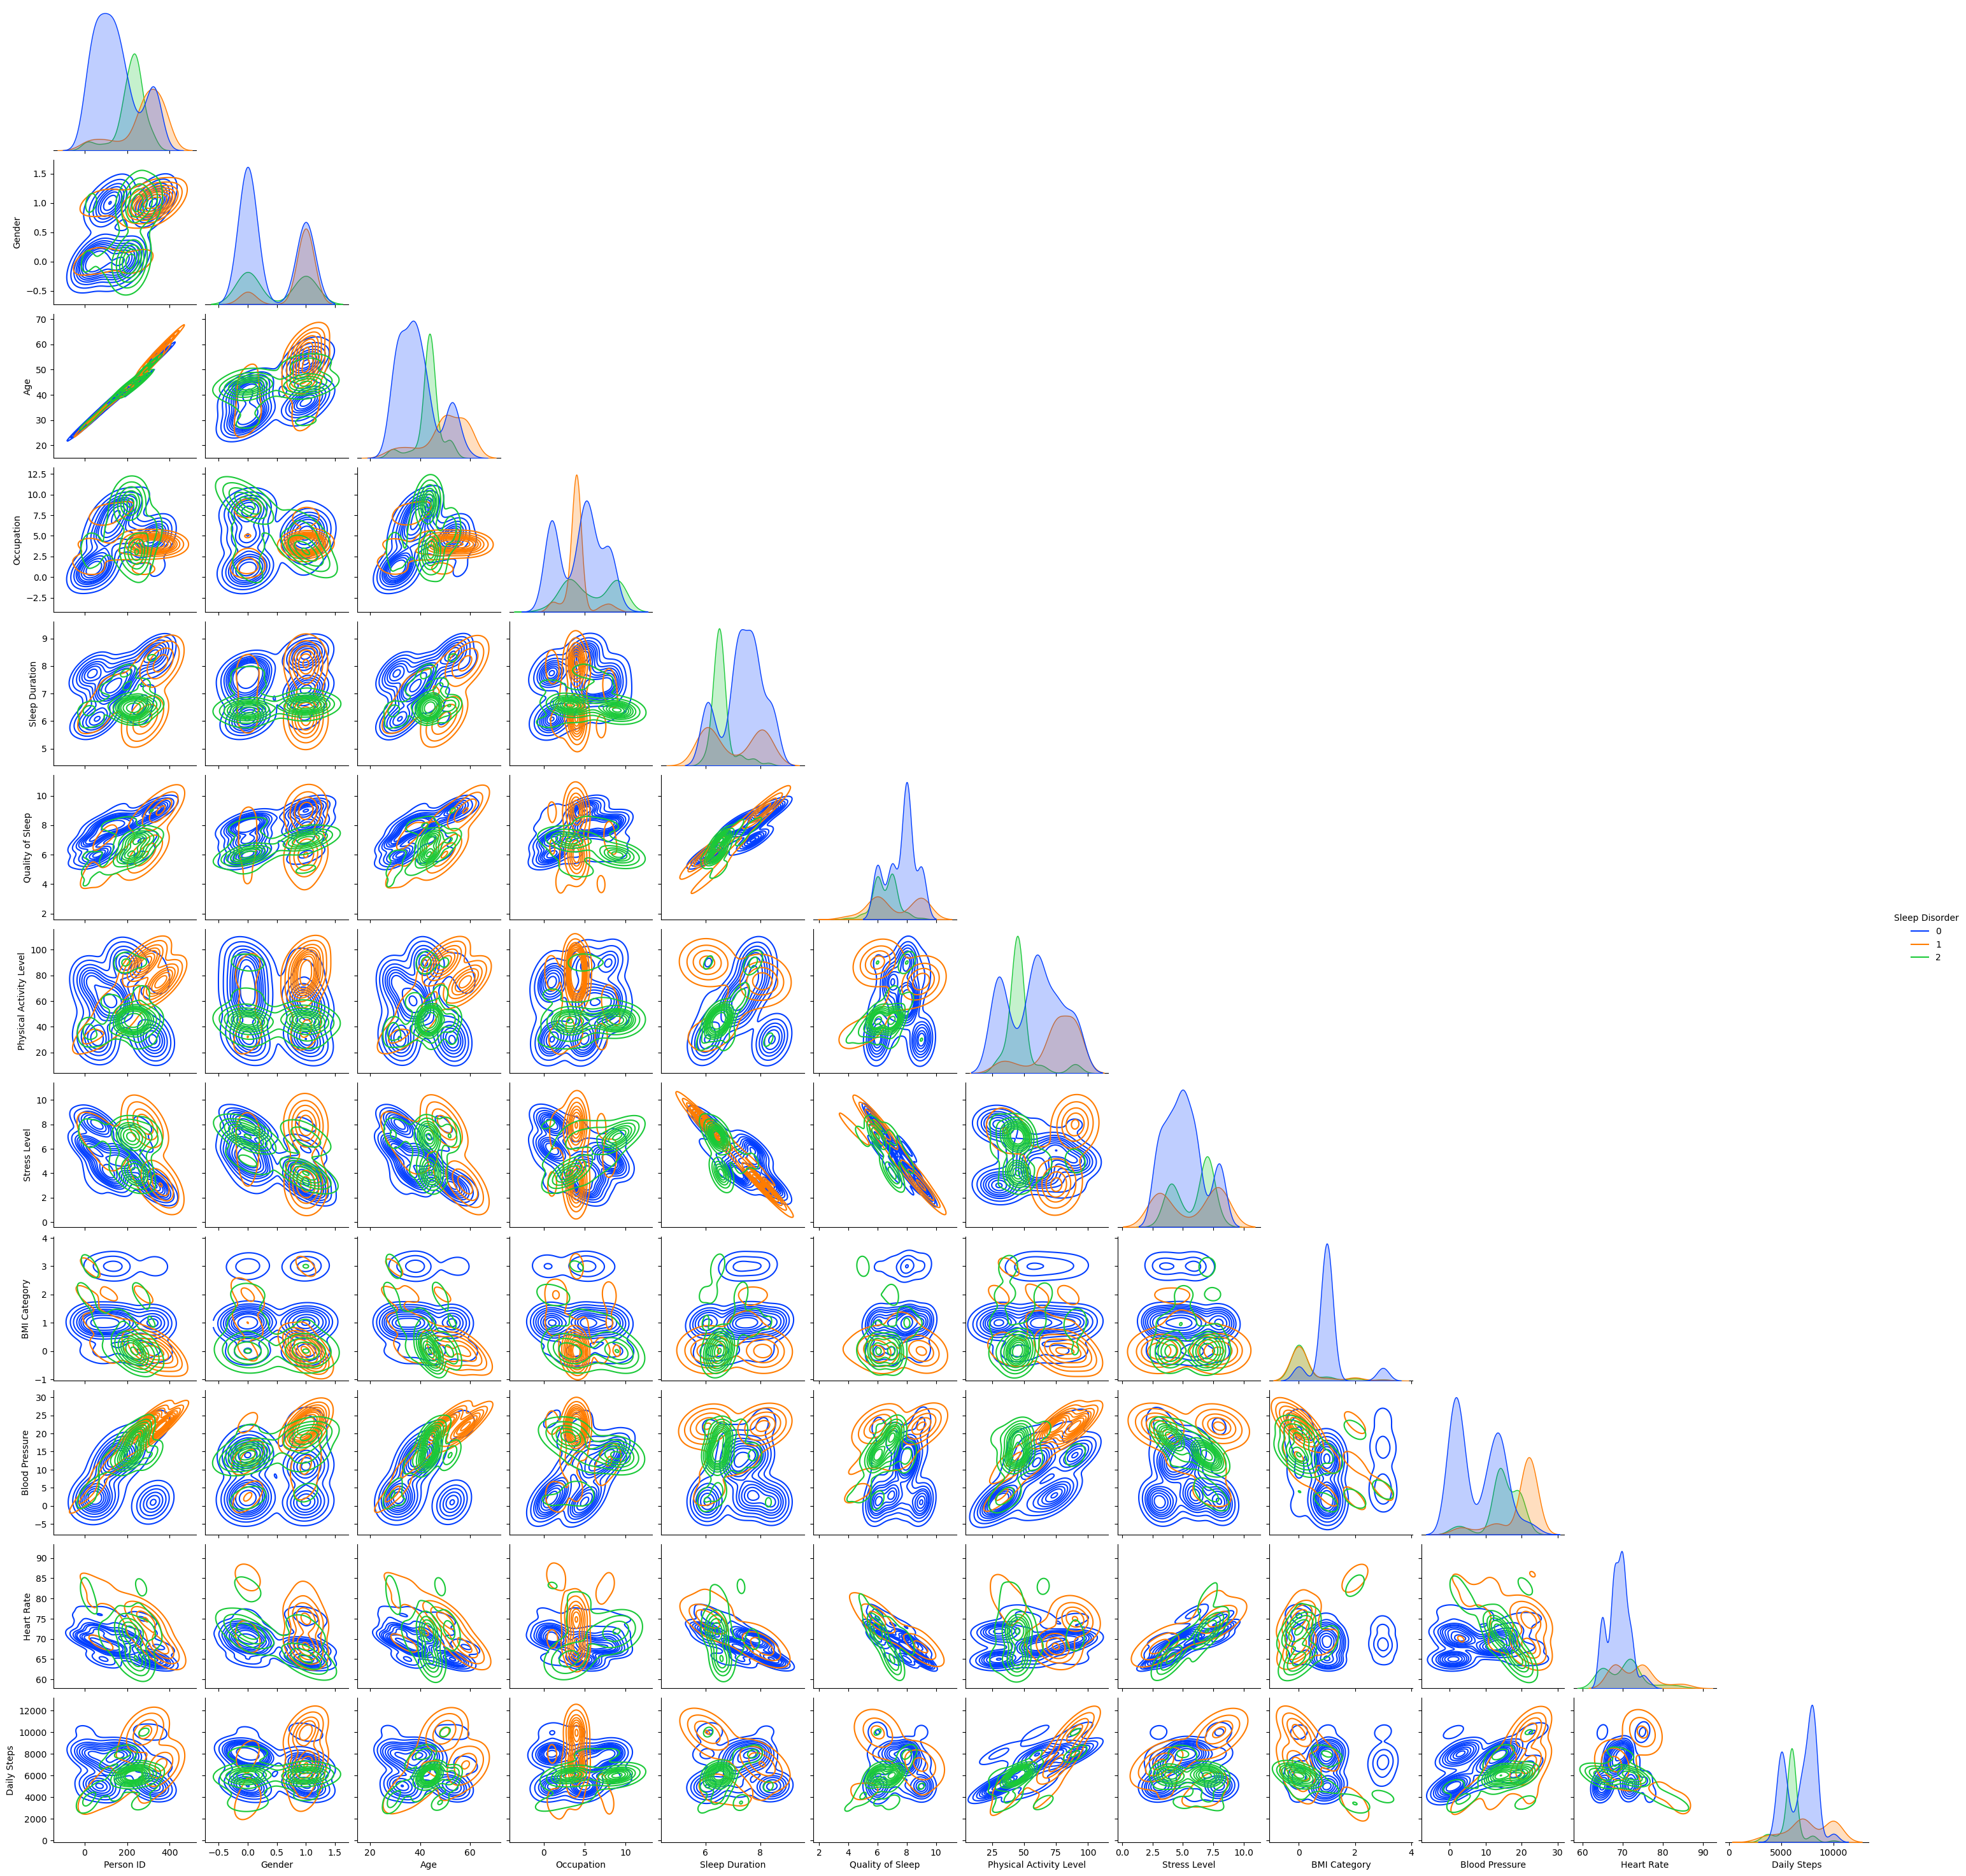

In [15]:
# Now everything is number. But wait! Do we need all the features? Person ID will not be correlated to Sleep Disorder. let's check it out
sns.pairplot(df, kind='kde', palette=sns.color_palette('bright'), hue='Sleep Disorder', corner=True)

In [16]:
df.head

<bound method NDFrame.head of      Person ID  Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0            1       0   27           0             6.1                 6   
1            2       0   28           1             6.2                 6   
2            3       0   28           1             6.2                 6   
3            4       0   28           2             5.9                 4   
4            5       0   28           2             5.9                 4   
..         ...     ...  ...         ...             ...               ...   
369        370       1   59           4             8.1                 9   
370        371       1   59           4             8.0                 9   
371        372       1   59           4             8.1                 9   
372        373       1   59           4             8.1                 9   
373        374       1   59           4             8.1                 9   

     Physical Activity Level  Stress Level  B

In [17]:
df = df.drop(columns=['Person ID'])
y_col = 'Sleep Disorder'

df_y = df[[y_col]]
X_cols = list(df.columns)
X_cols.remove(y_col)
df_X = df[X_cols]
df_X.head()

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
0       0   27           0             6.1                 6   
1       0   28           1             6.2                 6   
2       0   28           1             6.2                 6   
3       0   28           2             5.9                 4   
4       0   28           2             5.9                 4   

   Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
0                       42             6             0               0   
1                       60             8             1               1   
2                       60             8             1               1   
3                       30             8             2               2   
4                       30             8             2               2   

   Heart Rate  Daily Steps  
0          77         4200  
1          75        10000  
2          75        10000  
3          85         3000  
4          85         3000

### Any machine learning dataset needs to be split into training and testing data. This is done so as to remove any bias in our testing. Since the ML algorithm "sees" the training data, the result derived from training data might not provide a clear picture on how the model might work on unseen data. Hence we keep the test data hidden from the ML algorithm, and evaluate our model's performance on this data.


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_X, test_X, train_y, test_y = train_test_split(df_X, df_y, test_size=0.3, random_state=42)

In [20]:
# Verify we have the correct data
train_X.head(2)

Gender  Age  Occupation  Sleep Duration  Quality of Sleep  \
19        0   30           1             7.6                 7   
357       1   58           4             8.0                 9   

     Physical Activity Level  Stress Level  BMI Category  Blood Pressure  \
19                        75             6             1               3   
357                       75             3             0              22   

     Heart Rate  Daily Steps  
19           70         8000  
357          68         7000

In [21]:
# Let's train a model now
from sklearn.neighbors import KNeighborsClassifier

In [22]:
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=11)

In [23]:
# get predictions with the fitted model
predictions = knn_model.predict(test_X)

### To judge classification accuracy, we need to look at a few metrics, such as precision, recall and accuracy. All of these can be computed using the classification_report function


In [24]:
from sklearn.metrics import classification_report

In [25]:
report = classification_report(test_y, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        62
           1       0.95      0.70      0.81        27
           2       0.70      0.88      0.78        24

    accuracy                           0.88       113
   macro avg       0.86      0.84      0.84       113
weighted avg       0.89      0.88      0.88       113



### From the above table, we conclude that we have very high accuracy(94%) of predicting healthy people. we can also see that Disease type 1 has slightly better accuracy over disease type 2


In [28]:
# Do the same steps with a different "number of neighbors" factor
knn_model = KNeighborsClassifier(n_neighbors= 6)
knn_model.fit(train_X, train_y)
predictions = knn_model.predict(test_X)
report = classification_report(test_y, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        62
           1       0.92      0.81      0.86        27
           2       0.80      0.83      0.82        24

    accuracy                           0.90       113
   macro avg       0.88      0.87      0.88       113
weighted avg       0.90      0.90      0.90       113



### K-NN is the simplest classification model. But can we do better?



In [32]:
# Let's try to fit a few model models, starting with decision trees and random forests
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### From the above imports, we can already figure out that RandomForest is a collection of many models, since it is an ensemble modelling technique

In [37]:
# create a decision tree model
dtree = DecisionTreeClassifier(max_depth=7)
# fit the model
dtree.fit(train_X, train_y)
dtree_preds = dtree.predict(test_X)
print(classification_report(test_y, dtree_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.90      0.67      0.77        27
           2       0.77      0.83      0.80        24

    accuracy                           0.88       113
   macro avg       0.86      0.83      0.84       113
weighted avg       0.88      0.88      0.87       113



In [39]:
# Do the same with Random forest and see the classification report for this model
rforest = RandomForestClassifier(max_depth=7)
# fit the model
rforest.fit(train_X, train_y)
rforest_preds = rforest.predict(test_X)
print(classification_report(test_y, rforest_preds))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        62
           1       0.91      0.74      0.82        27
           2       0.77      0.83      0.80        24

    accuracy                           0.89       113
   macro avg       0.87      0.85      0.86       113
weighted avg       0.90      0.89      0.89       113



### Let us see another classification modelling technique called SVM <- Support Vector Machines

In [33]:
from sklearn.svm import SVC

In [36]:
# create a decision tree model
sv_classifier = DecisionTreeClassifier()
# fit the model
sv_classifier.fit(train_X, train_y)
sv_classifier_preds = sv_classifier.predict(test_X)
print(classification_report(test_y, sv_classifier_preds))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95        62
           1       0.90      0.67      0.77        27
           2       0.77      0.83      0.80        24

    accuracy                           0.88       113
   macro avg       0.86      0.83      0.84       113
weighted avg       0.88      0.88      0.87       113



### It is recommended that you understand each technique, and the underlying principles of all the models on this notebook. It is enough if you understand these 4 models thoroughly for classification